In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
#libraries for data manipulation(pandas),text processing (string),machine learning (sklearn),and text preprocessing (nltk).

In [2]:
#INITIALIZE PREPROCESSING TOOLS

# Initialize lemmatizer(reducing words to their base form) and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words and lemmatize
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text


In [3]:
#LOAD AND PREPROCESS THE DATASET

# Load the dataset
df = pd.read_csv('movie.csv')

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display the column names to verify
print("Columns in the dataset:", df.columns)

# Check for missing values
print(df.isnull().sum())
df = df.dropna()

Columns in the dataset: Index(['text', 'label'], dtype='object')
text     0
label    0
dtype: int64


In [4]:
# Split the data into training and testing sets, with 20% of the data reserved for testing

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [5]:
#VECTORIZATION- Convert text data into numerical format using TF-IDF vectorization, capturing both unigrams and bigrams.

# Initialize TfidfVectorizer with bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)

In [6]:
#TRAIN THE MODEL-train a logistic regression model using the vectorized training data.

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [7]:
#EVALUATE THE MODEL

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# confusion matrix - TN  FP
#                    FN  TP

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print('Classification Report:')
print(class_report)
#Precision= (TP+FP)/TP   -how many of the predicted positives are actually positive.
#Recall-how many of the actual positives were correctly predicted =(TP+FN)/TP
#F1-Score: The harmonic mean of precision and recall, providing a single metric that balances both=2×(Precision+Recall)/Precision×Recall
#Support- The number of true instances for each class in the test data.





Accuracy: 0.889
Confusion Matrix:
[[3455  511]
 [ 377 3657]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      3966
    Positive       0.88      0.91      0.89      4034

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



In [8]:
#SAVE AND LOAD THE MODEL

# Save the model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Load the model and vectorizer for testing
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')


In [9]:
# DEFINE PREDICTION FUNCTION 

def predict_sentiment(text):
    # Preprocess the text
    text = preprocess_text(text)
    # Transform the text using the loaded vectorizer
    text_vec = vectorizer.transform([text])
    # Predict the sentiment using the loaded model
    prediction = model.predict(text_vec)
    # Map the prediction to a sentiment label
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

# This Define a function to preprocess, vectorize, and predict the sentiment of new text inputs.

In [10]:
#TESTING 

new_sentence_1 = "I absolutely loved this movie!"
print(f'Sentiment: {predict_sentiment(new_sentence_1)}')

new_sentence_2 = "It was a terrible movie."
print(f'Sentiment: {predict_sentiment(new_sentence_2)}')

new_sentence_3 = "I liked the movie,it was very interesting and good characters"
print(f'Sentiment: {predict_sentiment(new_sentence_3)}')

new_sentence_3 = "I did not like it,very lengthy movie"
print(f'Sentiment: {predict_sentiment(new_sentence_3)}')


Sentiment: Positive
Sentiment: Negative
Sentiment: Positive
Sentiment: Negative


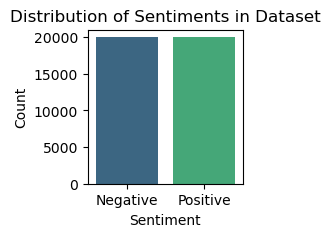

Sentiment Counts:
Positive: 19981
Negative: 20019


In [12]:
#HERE ARE A FEW GRAPHS RELATED TO THIS ANALYSIS 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2, 2))
sns.countplot(x='label', data=df, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Dataset')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

sentiment_counts = df['label'].value_counts()
print('Sentiment Counts:')
print(f'Positive: {sentiment_counts.get(1, 0)}')
print(f'Negative: {sentiment_counts.get(0, 0)}')

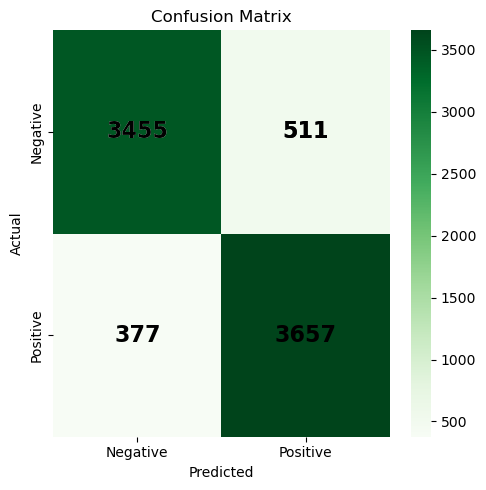

In [33]:
#Confusion Matrix-The confusion matrix helps to visualize the performance of the classification model, showing the true vs. predicted labels.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5)) 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cbar=True)

for text in ax.texts:
    text.set_size(16)  
    text.set_fontweight('bold')  # Optional: make the text bold

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Adjust layout to fit everything
plt.tight_layout()
# Manually ensure all annotations are visible
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', 
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=16, color='black',weight='bold' )
plt.show()



<Figure size 500x500 with 0 Axes>

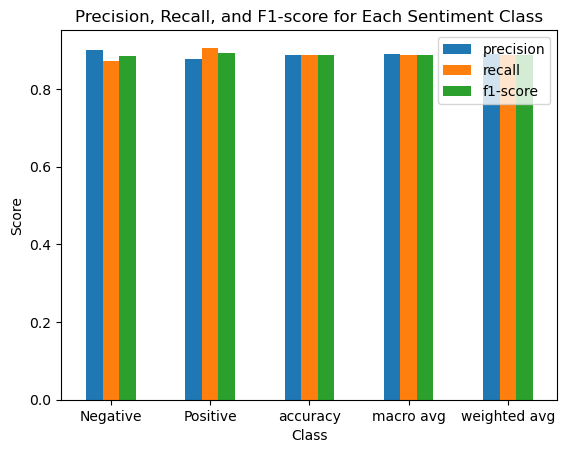

In [19]:
#Classification Report Metrics-This graph visualizes the precision, recall, and F1-score for each sentiment class.

class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(5, 5))
class_report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Precision, Recall, and F1-score for Each Sentiment Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


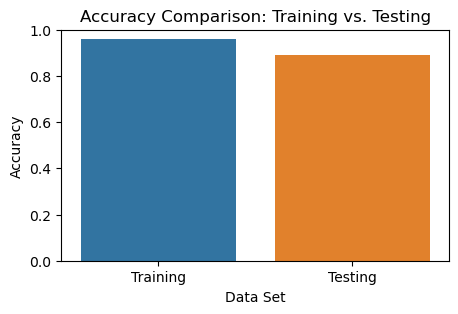

Training Accuracy: 0.96090625
Testing Accuracy: 0.889


In [15]:
#Training vs. Testing Accuracy-This bar plot compares the accuracy of the model on the training and testing datasets.
accuracy_score_train = model.score(X_train_vec, y_train)
accuracy_score_test = model.score(X_test_vec, y_test)

accuracy_data = {'Data Set': ['Training', 'Testing'], 'Accuracy': [accuracy_score_train, accuracy_score_test]}
accuracy_df = pd.DataFrame(accuracy_data)

plt.figure(figsize=(5, 3))
sns.barplot(x='Data Set', y='Accuracy', data=accuracy_df)
plt.ylim(0, 1)
plt.title('Accuracy Comparison: Training vs. Testing')
plt.show()


accuracy_train = model.score(X_train_vec, y_train)
print(f'Training Accuracy: {accuracy_train}')
accuracy_test = model.score(X_test_vec, y_test)
print(f'Testing Accuracy: {accuracy_test}')